<a href="https://colab.research.google.com/github/phu0n9/BigData_movie/blob/master/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# RMIT University in Vietnam
# Course: EEET2574 Big Data in Engineering
# Semester: 2020B
# Assessment: Big Data Project
# Authors: 
#   Tran Dam Quan           - s3678708
#   Nguyen Huynh Anh Phuong - s3695662
#   Le Nguyen Thien Phu     - s3639855
#   Tran Phi                - s3636649
# Date: 27/09/2020

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Group Assignment"

 cast.csv	 genre_point.csv     movies.csv		   title.tsv
 cast_data.csv	'IMDb movies.csv'    movies_metadata.csv
 data.ipynb	'IMDb ratings.csv'   name.tsv
 extract.ipynb	 modeling.ipynb      statistic.ipynb


# Importing libraries

## Importing general library

In [ ]:
import pandas as pd 
import numpy as np
from scipy import stats
import datetime
import sys

## Importing plotting library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Merge AllMoviesClean & Imdb Data

In [ ]:
imdb_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Group Assignment/IMDb movies.csv", delimiter=",")
imdb_df = imdb_df.rename(columns={'imdb_title_id':'imdb_id'})
imdb_df = imdb_df.drop(columns=['description','metascore','production_company','country','language','writer','director','actors','usa_gross_income','year','original_title','avg_vote','votes'])
imdb_df['year'] = pd.DatetimeIndex(imdb_df['date_published']).year
imdb_df.head()

,imdb_id,title,date_published,genre,duration,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,year
0,tt0000574,The Story of the Kelly Gang,1906-12-26,"Biography, Crime, Drama",70,$ 2250,NaN,7.0,7.0,1906
1,tt0001892,Den sorte drøm,1911-08-19,Drama,53,NaN,NaN,4.0,2.0,1911
2,tt0002101,Cleopatra,1912-11-13,"Drama, History",100,$ 45000,NaN,24.0,3.0,1912
3,tt0002130,L'Inferno,1911-03-06,"Adventure, Drama, Fantasy",68,NaN,NaN,28.0,14.0,1911
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1913,"Biography, Drama",60,NaN,NaN,12.0,5.0,1913


In [ ]:
meta_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Group Assignment/movies_metadata.csv", delimiter=",",low_memory=False)
meta_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
meta_data = meta_data[['imdb_id','popularity','overview']]

In [ ]:
meta_data.head()

,imdb_id,popularity,overview
0,tt0114709,21.946943,"Led by Woody, Andy's toys live happily in his ..."
1,tt0113497,17.015539,When siblings Judy and Peter discover an encha...
2,tt0113228,11.7129,A family wedding reignites the ancient feud be...
3,tt0114885,3.859495,"Cheated on, mistreated and stepped on, the wom..."
4,tt0113041,8.387519,Just when George Banks has recovered from his ...


In [ ]:
merge_df = pd.merge(imdb_df,meta_data,how='inner',on='imdb_id')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34521 entries, 0 to 34520
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                34521 non-null  object 
 1   title                  34521 non-null  object 
 2   date_published         34521 non-null  object 
 3   genre                  34521 non-null  object 
 4   duration               34521 non-null  int64  
 5   budget                 13733 non-null  object 
 6   worlwide_gross_income  17770 non-null  object 
 7   reviews_from_users     33754 non-null  float64
 8   reviews_from_critics   33303 non-null  float64
 9   year                   34521 non-null  int64  
 10  popularity             34519 non-null  object 
 11  overview               33932 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.4+ MB


In [ ]:
dataframe = merge_df.drop(merge_df[(merge_df['budget'].isnull()) | (merge_df['worlwide_gross_income'].isnull())].index)

In [ ]:
dataframe

,imdb_id,title,date_published,genre,duration,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,year,popularity,overview
83,tt0010323,Das Cabinet des Dr. Caligari,1920-02-27,"Fantasy, Horror, Mystery",76,$ 18000,$ 8811,218.0,148.0,1920,7.191271,The Cabinet of Dr. Caligari is eerie and expre...
110,tt0012190,The Four Horsemen of the Apocalypse,1923-01-08,"Drama, Romance, War",150,$ 800000,$ 9183673,44.0,16.0,1923,1.717444,"Set immediately before World War I, it deals w..."
112,tt0012349,The Kid,1921-02-06,"Comedy, Drama, Family",68,$ 250000,$ 26916,151.0,97.0,1921,8.168456,Considered one of Charlie Chaplin's best films...
163,tt0014624,A Woman of Paris: A Drama of Fate,1923-11-04,"Drama, Romance",82,$ 351000,$ 11233,36.0,22.0,1923,1.74686,When Marie St. Clair believes she has been jil...
205,tt0015864,The Gold Rush,1925-07-13,"Adventure, Comedy, Drama",95,$ 923000,$ 26916,175.0,121.0,1925,6.202041,A lone prospector ventures into Alaska looking...
...,...,...,...,...,...,...,...,...,...,...,...,...
34503,tt6389344,Tri bogatyrya i Morskoy tsar,2017-01-01,"Animation, Action, Adventure",75,$ 4000000,$ 13816357,NaN,1.0,2017,0.468664,No plot overview available
34507,tt6569546,Vurdalaki,2017-02-22,"Action, Fantasy, Horror",90,RUR 162000000,$ 782438,1.0,4.0,2017,9.334447,The story takes place in 18th century russia. ...
34510,tt6574272,Phoenix Forgotten,2017-04-21,"Horror, Mystery, Sci-Fi",87,$ 2800000,$ 3697729,68.0,66.0,2017,12.560942,20 years after three teenagers disappeared in ...
34511,tt6597454,Selfie,2017-06-23,Comedy,85,EUR 10000,$ 184395,NaN,9.0,2017,0.313827,NaN


# Plot graphs

In [ ]:
movie_count = dataframe.groupby('year',as_index=False)['imdb_id'].count().rename(columns={'imdb_id':'count'})
movie_count.head()

,year,count
0,1920,1
1,1921,1
2,1923,2
3,1925,1
4,1927,3


In [ ]:
fig = go.Figure(data=go.Scatter(x=movie_count['year'],y=movie_count['count'],mode='lines'))
fig.update_layout(title='Movies through 1920 to 2019',xaxis_title="Year",yaxis_title="Number of movies")
fig.show()

# Drop movies before 1980s and after 2017



`Second Golden Age of Holywood`

In [ ]:
dataframe['Month'] = pd.DatetimeIndex(dataframe['date_published']).month
dataframe['Day'] = pd.DatetimeIndex(dataframe['date_published']).day
dataframe['date_published'] = pd.to_datetime(dataframe['date_published'])
dataframe['day_of_week'] = dataframe['date_published'].dt.day_name()
dataframe['month_name'] = dataframe['date_published'].dt.month_name()
dataframe.head()

,imdb_id,title,date_published,genre,duration,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,year,popularity,overview,Month,Day,day_of_week,month_name
83,tt0010323,Das Cabinet des Dr. Caligari,1920-02-27,"Fantasy, Horror, Mystery",76,$ 18000,$ 8811,218.0,148.0,1920,7.191271,The Cabinet of Dr. Caligari is eerie and expre...,2,27,Friday,February
110,tt0012190,The Four Horsemen of the Apocalypse,1923-01-08,"Drama, Romance, War",150,$ 800000,$ 9183673,44.0,16.0,1923,1.717444,"Set immediately before World War I, it deals w...",1,8,Monday,January
112,tt0012349,The Kid,1921-02-06,"Comedy, Drama, Family",68,$ 250000,$ 26916,151.0,97.0,1921,8.168456,Considered one of Charlie Chaplin's best films...,2,6,Sunday,February
163,tt0014624,A Woman of Paris: A Drama of Fate,1923-11-04,"Drama, Romance",82,$ 351000,$ 11233,36.0,22.0,1923,1.74686,When Marie St. Clair believes she has been jil...,11,4,Sunday,November
205,tt0015864,The Gold Rush,1925-07-13,"Adventure, Comedy, Drama",95,$ 923000,$ 26916,175.0,121.0,1925,6.202041,A lone prospector ventures into Alaska looking...,7,13,Monday,July


In [ ]:
year_df = dataframe[(dataframe['year'] >= 1980) & (dataframe['year'] <= 2017)]
year_df.reset_index(drop=True,inplace=True)

In [ ]:
year_df.loc[:,'popularity'] = year_df['popularity'].replace(',',".",regex=True).astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
year_df

,imdb_id,title,date_published,genre,duration,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,year,popularity,overview,Month,Day,day_of_week,month_name
0,tt0035423,Kate & Leopold,2002-04-05,"Comedy, Fantasy, Romance",118,$ 48000000,$ 76019048,330.0,127.0,2002,7.196356,When her scientist ex-boyfriend discovers a po...,4,5,Friday,April
1,tt0038733,A Matter of Life and Death,2017-12-08,"Comedy, Drama, Fantasy",104,GBP 320000,$ 124241,168.0,75.0,2017,6.486938,When a young airman miraculously survives bail...,12,8,Friday,December
2,tt0066921,A Clockwork Orange,2000-03-17,"Crime, Drama, Sci-Fi",136,$ 2200000,$ 26903440,1481.0,168.0,2000,17.112594,Demonic gang-leader Alex goes on the spree of ...,3,17,Friday,March
3,tt0067962,Warnung vor einer heiligen Nutte,1983-07-15,"Comedy, Drama",103,DEM 1100000,$ 8144,12.0,29.0,1983,1.147121,Tensions between members of a film crew build ...,7,15,Friday,July
4,tt0077288,La cage aux folles,1980-11-07,Comedy,97,FRF 7000000,$ 20424259,43.0,36.0,1980,3.140011,Two gay men living in St. Tropez have their li...,11,7,Friday,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8870,tt6389344,Tri bogatyrya i Morskoy tsar,2017-01-01,"Animation, Action, Adventure",75,$ 4000000,$ 13816357,NaN,1.0,2017,0.468664,No plot overview available,1,1,Sunday,January
8871,tt6569546,Vurdalaki,2017-02-22,"Action, Fantasy, Horror",90,RUR 162000000,$ 782438,1.0,4.0,2017,9.334447,The story takes place in 18th century russia. ...,2,22,Wednesday,February
8872,tt6574272,Phoenix Forgotten,2017-04-21,"Horror, Mystery, Sci-Fi",87,$ 2800000,$ 3697729,68.0,66.0,2017,12.560942,20 years after three teenagers disappeared in ...,4,21,Friday,April
8873,tt6597454,Selfie,2017-06-23,Comedy,85,EUR 10000,$ 184395,NaN,9.0,2017,0.313827,NaN,6,23,Friday,June


# Calculating profit and ROI


In [ ]:
year_df['worlwide_gross_income'] = year_df.loc[:,'worlwide_gross_income'].str.replace('$ ','',regex=False)
year_df['worlwide_gross_income'] = year_df.loc[:,'worlwide_gross_income'].apply(pd.to_numeric)
year_df['worlwide_gross_income'] = year_df.loc[:,'worlwide_gross_income'].astype(np.int64)
year_df = year_df.rename(columns={'worlwide_gross_income':'revenue'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
new_df = year_df
new_df['currency_code'] = new_df['budget'].str.replace(' \d+', '')
new_df.drop(new_df[new_df['currency_code']!='$'].index,inplace=True)
new_df.drop(columns='currency_code',inplace=True)

In [ ]:
new_df['budget'] = new_df['budget'].str.replace('$ ','',regex=False)
new_df['budget'] = new_df['budget'].apply(pd.to_numeric)
new_df['budget'] = new_df['budget'].astype(np.int64)

***
**`profit = worldwide gross - budget`**

**`ROI = (profit/ budget)* 100`**
***

In [ ]:
new_df['profit'] = new_df['revenue'] - new_df['budget']
new_df['ROI'] = (new_df['profit']/ new_df['budget'])*100

# Actor, actress, director, writer and Genre

In [ ]:
imdb_cast = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Group Assignment/cast.csv", delimiter=",",low_memory=False)
imdb_cast

,imdb_id,imdb_name_id,category,primaryName
0,tt0000001,nm0005690,director,William K.L. Dickson
1,tt0000005,nm0005690,director,William K.L. Dickson
2,tt0000006,nm0005690,director,William K.L. Dickson
3,tt0000007,nm0005690,director,William K.L. Dickson
4,tt0000008,nm0005690,director,William K.L. Dickson
...,...,...,...,...
23811316,tt9916856,nm10538650,actress,Anna Fitoussi
23811317,tt9916856,nm10538646,actor,Andreas Demmel
23811318,tt9916856,nm10538647,actress,Kathrin Knöpfle
23811319,tt9916856,nm10538645,director,Johan Planefeldt


In [ ]:
cast = pd.merge(imdb_cast,new_df,on='imdb_id',how='inner').loc[:,('imdb_id','imdb_name_id','category','primaryName','popularity','revenue','profit')]
cast['revenue1'] = cast['revenue']
cast

,imdb_id,imdb_name_id,category,primaryName,popularity,revenue,profit,revenue1
0,tt0162661,nm0410331,writer,Washington Irving,11.072361,206071502,106071502,206071502
1,tt0162661,nm0002091,actor,Michael Gambon,11.072361,206071502,106071502,206071502
2,tt0162661,nm0001669,actress,Miranda Richardson,11.072361,206071502,106071502,206071502
3,tt0162661,nm0000318,director,Tim Burton,11.072361,206071502,106071502,206071502
4,tt0162661,nm0000136,actor,Johnny Depp,11.072361,206071502,106071502,206071502
...,...,...,...,...,...,...,...,...
47883,tt5777418,nm5815221,writer,Paco Bardales,0.122363,1619054,1319054,1619054
47884,tt5777418,nm8176825,actor,Bruno Espejo,0.122363,1619054,1319054,1619054
47885,tt5777418,nm8189535,actress,Lupita Mora,0.122363,1619054,1319054,1619054
47886,tt5777418,nm8189508,actor,Eduardo Ramos,0.122363,1619054,1319054,1619054


In [ ]:
cast_data = cast.loc[:,('imdb_id','imdb_name_id','category','popularity','profit')].groupby('imdb_name_id',as_index=False).agg({'imdb_id':np.size,'popularity':np.mean,'profit':np.mean}).rename(columns={'imdb_id':'count'})
cast_data = cast_data[cast_data['count'] > 1]
cast_data = pd.merge(new_df[['imdb_id','year']],cast.loc[:,('imdb_id','imdb_name_id','category','primaryName')],how='inner',on='imdb_id').merge(cast_data,how='inner',on='imdb_name_id')
cast_data = cast_data[(cast_data['year'] >= 1980) & (cast_data['year'] <= 2017)]
cast_data

,imdb_id,year,imdb_name_id,category,primaryName,count,popularity,profit
0,tt0035423,2002,nm0000212,actress,Meg Ryan,19,7.776708,4.180543e+07
1,tt0090660,1986,nm0000212,actress,Meg Ryan,19,7.776708,4.180543e+07
2,tt0093260,1987,nm0000212,actress,Meg Ryan,19,7.776708,4.180543e+07
3,tt0098635,1990,nm0000212,actress,Meg Ryan,19,7.776708,4.180543e+07
4,tt0099892,1990,nm0000212,actress,Meg Ryan,19,7.776708,4.180543e+07
...,...,...,...,...,...,...,...,...
34734,tt5909128,2016,nm2672655,writer,Oleg Malovichko,2,5.938218,-3.398430e+06
34735,tt5842624,2016,nm2108643,actor,Eddie Peng,2,24.285211,6.798467e+07
34736,tt6044910,2016,nm2108643,actor,Eddie Peng,2,24.285211,6.798467e+07
34737,tt5842624,2016,nm8458426,writer,Wai Ching Tam,2,24.285211,6.798467e+07


In [ ]:
cast_for_plot = cast_data.drop(columns='imdb_id').drop_duplicates()
cast_for_plot.to_csv('/content/drive/My Drive/Colab Notebooks/Group Assignment/cast_data.csv',index=False)

## Collaboration

### Actor vs actress

In [ ]:
actor_actress = pd.merge(cast[cast['category']=='actor'].loc[:,('imdb_id','imdb_name_id','primaryName')],cast[cast['category']=='actress'].loc[:,('imdb_id','imdb_name_id','primaryName','profit')],how='inner',on='imdb_id').groupby(['primaryName_x','primaryName_y'],as_index=False).agg({'imdb_id':np.size,'profit':np.mean}).rename(columns={'primaryName_x':'actor','primaryName_y':'actress','imdb_id':'count'})
actor_actress = actor_actress[actor_actress['count'] >= 5].sort_values('count',ascending=False).reset_index(drop=True)
actor_actress

,actor,actress,count,profit
0,George Clooney,Julia Roberts,7,9.954275e+07
1,Daniel Radcliffe,Emma Watson,6,8.136241e+08
2,Johnny Depp,Helena Bonham Carter,6,2.591897e+08
3,Rupert Grint,Emma Watson,6,8.136241e+08
4,Eric Stuart,Rachael Lillis,5,6.865795e+07
5,Eric Stuart,Veronica Taylor,5,6.865795e+07
6,Robert Pattinson,Kristen Stewart,5,5.920635e+08
7,Sam Rockwell,Drew Barrymore,5,1.499766e+06


### Actor vs directors

In [ ]:
actor_director = pd.merge(cast[cast['category']=='actor'].loc[:,('imdb_id','imdb_name_id','primaryName','profit')],cast[cast['category']=='director'].loc[:,('imdb_id','imdb_name_id','primaryName')],how='inner',on='imdb_id').groupby(['primaryName_x','primaryName_y'],as_index=False).agg({'imdb_id':np.size,'profit':np.mean}).rename(columns={'primaryName_x':'actor','primaryName_y':'director','imdb_id':'count'})
actor_director = actor_director[actor_director['count'] >= 5].sort_values('count',ascending=False).reset_index(drop=True)
actor_director.head(10)

,actor,director,count,profit
0,Adam Sandler,Dennis Dugan,8,1.256039e+08
1,Johnny Depp,Tim Burton,8,1.982080e+08
2,Mel Gibson,Richard Donner,6,1.512086e+08
3,Ethan Hawke,Richard Linklater,6,8.158182e+06
4,George Clooney,Steven Soderbergh,6,1.385729e+08
5,Ian McKellen,Peter Jackson,6,8.193179e+08
6,Antonio Banderas,Robert Rodriguez,6,7.369857e+07
7,Tom Hanks,Ron Howard,5,2.958502e+08
8,Russell Crowe,Ridley Scott,5,1.397367e+08
9,Robert De Niro,Martin Scorsese,5,4.424447e+07


### Actor vs writer

In [ ]:
actor_writer = pd.merge(cast[cast['category']=='actor'].loc[:,('imdb_id','imdb_name_id','primaryName','profit')],cast[cast['category']=='writer'].loc[:,('imdb_id','imdb_name_id','primaryName')],how='inner',on='imdb_id').groupby(['primaryName_x','primaryName_y'],as_index=False).agg({'imdb_id':np.size,'profit':np.mean}).rename(columns={'primaryName_x':'actor','primaryName_y':'writer','imdb_id':'count'})
actor_writer = actor_writer[actor_writer['count'] >= 5].sort_values('count',ascending=False).reset_index(drop=True)
actor_writer.head(10)

,actor,writer,count,profit
0,Adam Sandler,Tim Herlihy,10,1.065890e+08
1,Daniel Radcliffe,J.K. Rowling,7,8.192618e+08
2,Rupert Grint,J.K. Rowling,7,8.192618e+08
3,Ian McKellen,Philippa Boyens,6,8.193179e+08
4,Vin Diesel,Gary Scott Thompson,6,6.475866e+08
5,Rupert Grint,Steve Kloves,6,8.243753e+08
6,Robert Englund,Wes Craven,6,3.810193e+07
7,Paul Walker,Gary Scott Thompson,6,5.099775e+08
8,Leonard Nimoy,Gene Roddenberry,6,8.981277e+07
9,Johnny Depp,Terry Rossio,6,5.704197e+08


### Actress vs director

In [ ]:
actress_director = pd.merge(cast[cast['category']=='actress'].loc[:,('imdb_id','imdb_name_id','primaryName','profit')],cast[cast['category']=='director'].loc[:,('imdb_id','imdb_name_id','primaryName')],how='inner',on='imdb_id').groupby(['primaryName_x','primaryName_y'],as_index=False).agg({'imdb_id':np.size,'profit':np.mean}).rename(columns={'primaryName_x':'actress','primaryName_y':'director','imdb_id':'count'})
actress_director = actress_director[actress_director['count'] >= 5].sort_values('count',ascending=False).reset_index(drop=True)
actress_director.head(10)

,actress,director,count,profit
0,Helena Bonham Carter,Tim Burton,6,2.813155e+08
1,Mia Farrow,Woody Allen,6,9.148305e+05
2,Veronica Taylor,Kunihiko Yuyama,6,7.453984e+07
3,Veronica Taylor,Michael Haigney,6,7.453984e+07
4,Catherine Keener,Nicole Holofcener,5,7.012507e+06
5,Jessica Alba,Robert Rodriguez,5,3.606144e+07
6,Milla Jovovich,Paul W.S. Anderson,5,1.629779e+08
7,Rachael Lillis,Kunihiko Yuyama,5,6.865795e+07
8,Rachael Lillis,Michael Haigney,5,6.865795e+07
9,Rica Matsumoto,Kunihiko Yuyama,5,6.271887e+07


### Actress vs writer

In [ ]:
actress_writer = pd.merge(cast[cast['category']=='actress'].loc[:,('imdb_id','imdb_name_id','primaryName','profit')],cast[cast['category']=='writer'].loc[:,('imdb_id','imdb_name_id','primaryName')],how='inner',on='imdb_id').groupby(['primaryName_x','primaryName_y'],as_index=False).agg({'imdb_id':np.size,'profit':np.mean}).rename(columns={'primaryName_x':'actress','primaryName_y':'writer','imdb_id':'count'})
actress_writer = actress_writer[actress_writer['count'] >= 5].sort_values('count',ascending=False).reset_index(drop=True)
actress_writer.head(10)

,actress,writer,count,profit
0,Emma Watson,J.K. Rowling,6,8.136241e+08
1,Veronica Taylor,Norman J. Grossfeld,6,7.453984e+07
2,Veronica Taylor,Takeshi Shudo,6,7.453984e+07
3,Emma Watson,Steve Kloves,5,8.186329e+08
4,Jamie Lee Curtis,Debra Hill,5,3.057284e+07
5,Kristen Stewart,Melissa Rosenberg,5,5.920635e+08
6,Kristen Stewart,Stephenie Meyer,5,5.920635e+08
7,Rachael Lillis,Norman J. Grossfeld,5,6.865795e+07
8,Rachael Lillis,Takeshi Shudo,5,6.865795e+07
9,Rica Matsumoto,Norman J. Grossfeld,5,6.271887e+07


### Director vs Writer

In [ ]:
director_writer = pd.merge(cast[cast['category']=='director'].loc[:,('imdb_id','imdb_name_id','primaryName','profit')],cast[cast['category']=='writer'].loc[:,('imdb_id','imdb_name_id','primaryName')],how='inner',on='imdb_id').groupby(['primaryName_x','primaryName_y'],as_index=False).agg({'imdb_id':np.size,'profit':np.mean}).rename(columns={'primaryName_x':'director','primaryName_y':'writer','imdb_id':'count'})
director_writer = director_writer[director_writer['count'] >= 5].sort_values('count',ascending=False).reset_index(drop=True)
director_writer.head(10)

,director,writer,count,profit
0,Peter Jackson,Fran Walsh,11,4.802452e+08
1,Ang Lee,James Schamus,8,3.690469e+07
2,Peter Jackson,Philippa Boyens,8,6.610058e+08
3,Kunihiko Yuyama,Norman J. Grossfeld,6,7.453984e+07
4,Peter Jackson,J.R.R. Tolkien,6,8.193179e+08
5,Michael Haigney,Takeshi Shudo,6,7.453984e+07
6,Michael Haigney,Norman J. Grossfeld,6,7.453984e+07
7,Kunihiko Yuyama,Takeshi Shudo,6,7.453984e+07
8,James Ivory,Ruth Prawer Jhabvala,6,-2.581750e+06
9,Danny Boyle,John Hodge,6,2.117331e+07


## Popularity

### actor

In [ ]:
actor = cast[cast['category'] == 'actor'].loc[:,('imdb_name_id','imdb_id','popularity')].groupby('imdb_name_id').agg({'popularity':np.mean,'imdb_id':np.size}).reset_index().rename(columns={'popularity':'actor_pop','imdb_id':'actors_in_movie'})
actor = pd.merge(cast.loc[:,('imdb_id','imdb_name_id')],actor,how='inner',on='imdb_name_id').rename(columns={'imdb_name_id':'actor_id'})
actor.drop(actor[actor['actors_in_movie'] == 1].index,inplace=True)
actor

,imdb_id,actor_id,actor_pop,actors_in_movie
0,tt0162661,nm0002091,12.361554,8
1,tt0340012,nm0002091,12.361554,8
2,tt0280707,nm0002091,12.361554,8
3,tt0117002,nm0002091,12.361554,8
4,tt1441951,nm0002091,12.361554,8
...,...,...,...,...
18926,tt4457820,nm0069783,2.388444,2
18964,tt1853739,nm1410105,5.907742,2
18965,tt2383068,nm1410105,5.907742,2
18983,tt0390384,nm1503403,7.578442,2


In [ ]:
actor_pop = actor.groupby('imdb_id',as_index=False).agg({'actor_pop':sum,'actor_id':np.size}).rename(columns={'actor_id':'actor_movie_count'})
actor_pop['actor_movie_pop'] = actor_pop['actor_pop'] / actor_pop['actor_movie_count']
actor_pop.drop(['actor_pop'],axis=1,inplace=True)
actor_pop

,imdb_id,actor_movie_count,actor_movie_pop
0,tt0035423,3,8.748445
1,tt0066921,2,9.998665
2,tt0077651,1,9.634168
3,tt0078767,2,8.030415
4,tt0079116,2,12.406851
...,...,...,...
6401,tt6070530,1,0.840625
6402,tt6083388,3,3.947110
6403,tt6113488,1,7.750526
6404,tt6265828,1,7.920034


### actress

In [ ]:
actress = cast[cast['category'] == 'actress'].loc[:,('imdb_name_id','imdb_id','popularity')].groupby('imdb_name_id').agg({'popularity':np.mean,'imdb_id':np.size}).reset_index().rename(columns={'popularity':'actress_pop','imdb_id':'actresses_in_movie'})
actress = pd.merge(cast.loc[:,('imdb_id','imdb_name_id')],actress,how='inner',on='imdb_name_id').rename(columns={'imdb_name_id':'actress_id'})
actress.drop(actress[actress['actresses_in_movie'] == 1].index,inplace=True)
actress

,imdb_id,actress_id,actress_pop,actresses_in_movie
0,tt0162661,nm0001669,7.470140,12
1,tt0293508,nm0001669,7.470140,12
2,tt0160429,nm0001669,7.470140,12
3,tt0116745,nm0001669,7.470140,12
4,tt0092965,nm0001669,7.470140,12
...,...,...,...,...
9840,tt1202532,nm1108521,0.501595,2
9951,tt1190539,nm1320089,6.718975,2
9952,tt1646959,nm1320089,6.718975,2
9995,tt2383068,nm1541272,6.677236,2


In [ ]:
actress_pop = actress.groupby('imdb_id',as_index=False).agg({'actress_pop':sum,'actress_id':np.size}).rename(columns={'actress_id':'actress_movie_count'})
actress_pop['actress_movie_pop'] = actress_pop['actress_pop'] / actress_pop['actress_movie_count']
actress_pop.drop(['actress_pop'],axis=1,inplace=True)
actress_pop

,imdb_id,actress_movie_count,actress_movie_pop
0,tt0035423,1,7.776708
1,tt0077651,1,8.547627
2,tt0078767,1,7.059906
3,tt0079302,1,8.755107
4,tt0079417,2,8.671958
...,...,...,...
5128,tt5778384,3,1.256404
5129,tt5909128,1,1.156079
5130,tt6003368,1,8.951005
5131,tt6113488,2,5.964918


### director

In [ ]:
director = cast[cast['category'] == 'director'].loc[:,('imdb_name_id','imdb_id','popularity')].groupby('imdb_name_id').agg({'popularity':np.mean,'imdb_id':np.size}).reset_index().rename(columns={'popularity':'director_pop','imdb_id':'director_in_movie'})
director = pd.merge(cast.loc[:,('imdb_id','imdb_name_id')],director,how='inner',on='imdb_name_id').rename(columns={'imdb_name_id':'director_id'})
director.drop(director[director['director_in_movie'] == 1].index,inplace=True)
director

,imdb_id,director_id,director_pop,director_in_movie
0,tt0162661,nm0000318,15.067531,18
1,tt1014759,nm0000318,15.067531,18
2,tt0096895,nm0000318,15.067531,18
3,tt0103776,nm0000318,15.067531,18
4,tt0408236,nm0000318,15.067531,18
...,...,...,...,...
10219,tt1899353,nm2153088,9.481859,2
10220,tt2265171,nm2153088,9.481859,2
10237,tt1129405,nm1322135,1.294602,2
10238,tt0946998,nm1322135,1.294602,2


In [ ]:
director_pop = director.groupby('imdb_id',as_index=False).agg({'director_pop':sum,'director_id':np.size}).rename(columns={'director_id':'director_movie_count'})
director_pop['director_movie_pop'] = director_pop['director_pop'] / director_pop['director_movie_count']
director_pop.drop(['director_pop'],axis=1,inplace=True)
director_pop

,imdb_id,director_movie_count,director_movie_pop
0,tt0035423,1,15.934599
1,tt0066921,1,15.983537
2,tt0077651,1,9.819353
3,tt0078767,1,11.053215
4,tt0079116,2,7.354229
...,...,...,...
5262,tt6083388,1,5.806312
5263,tt6113488,1,2.425265
5264,tt6265828,1,18.264861
5265,tt6389344,1,0.468888


### writer

In [ ]:
writer = cast[cast['category'] == 'writer'].loc[:,('imdb_name_id','imdb_id','popularity')].groupby('imdb_name_id').agg({'popularity':np.mean,'imdb_id':np.size}).reset_index().rename(columns={'popularity':'writer_pop','imdb_id':'writer_in_movie'})
writer = pd.merge(cast.loc[:,('imdb_id','imdb_name_id')],writer,how='inner',on='imdb_name_id').rename(columns={'imdb_name_id':'writer_id'})
writer.drop(writer[writer['writer_in_movie'] == 1].index,inplace=True)
writer

,imdb_id,writer_id,writer_pop,writer_in_movie
20,tt0162661,nm0001825,9.006363,4
21,tt0780653,nm0001825,9.006363,4
22,tt0114369,nm0001825,9.006363,4
23,tt0134273,nm0001825,9.006363,4
24,tt0113303,nm0001825,9.006363,4
...,...,...,...,...
14525,tt2473510,nm2065670,9.274591,2
14526,tt2436386,nm3091255,9.274591,2
14527,tt2473510,nm3091255,9.274591,2
14545,tt1190539,nm2974384,5.817782,2


In [ ]:
writer_pop = writer.groupby('imdb_id',as_index=False).agg({'writer_pop':sum,'writer_id':np.size}).rename(columns={'writer_id':'writer_movie_count'})
writer_pop['writer_movie_pop'] = writer_pop['writer_pop'] / writer_pop['writer_movie_count']
writer_pop.drop(['writer_pop'],axis=1,inplace=True)
writer_pop

,imdb_id,writer_movie_count,writer_movie_pop
0,tt0035423,1,7.377117
1,tt0077651,2,9.825820
2,tt0078767,4,13.545866
3,tt0079470,2,11.243368
4,tt0079668,1,11.071279
...,...,...,...
4608,tt6083388,1,2.648138
4609,tt6113488,1,3.636398
4610,tt6389344,1,1.474589
4611,tt6574272,1,43.574867


### combo cast

In [ ]:
combo_cast = pd.merge(actor_pop,actress_pop,how='outer',on='imdb_id').merge(director_pop,how='outer',on='imdb_id').merge(writer_pop,how='outer',on='imdb_id')
combo_cast = combo_cast.fillna(0)
combo_cast['crew_count'] = (combo_cast['actor_movie_count']+combo_cast['actress_movie_count'])
combo_cast['crew_pop'] = (combo_cast['actor_movie_pop']+ combo_cast['actress_movie_pop']) / combo_cast['crew_count']
combo_cast

,imdb_id,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,writer_movie_count,writer_movie_pop,crew_count,crew_pop
0,tt0035423,3.0,8.748445,1.0,7.776708,1.0,15.934599,1.0,7.377117,4.0,4.131288
1,tt0066921,2.0,9.998665,0.0,0.000000,1.0,15.983537,0.0,0.000000,2.0,4.999333
2,tt0077651,1.0,9.634168,1.0,8.547627,1.0,9.819353,2.0,9.825820,2.0,9.090897
3,tt0078767,2.0,8.030415,1.0,7.059906,1.0,11.053215,4.0,13.545866,3.0,5.030107
4,tt0079116,2.0,12.406851,0.0,0.000000,2.0,7.354229,0.0,0.000000,2.0,6.203426
...,...,...,...,...,...,...,...,...,...,...,...
6873,tt3819668,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,10.113339,0.0,NaN
6874,tt4057376,0.0,0.000000,0.0,0.000000,0.0,0.000000,2.0,4.013055,0.0,NaN
6875,tt4080672,0.0,0.000000,0.0,0.000000,0.0,0.000000,3.0,8.169884,0.0,NaN
6876,tt5973626,0.0,0.000000,0.0,0.000000,0.0,0.000000,2.0,16.272650,0.0,NaN


## revenue/profit 

### actor

In [ ]:
actor_rev_pro = cast[cast['category'] == 'actor'].loc[:,('imdb_name_id','imdb_id','revenue','revenue1','profit')].groupby('imdb_name_id').agg({'imdb_id':np.size,'revenue':np.sum,'revenue1':np.mean,'profit':np.mean}).reset_index().rename(columns={'imdb_id':'actors_in_movie','revenue':'sum_revenue','revenue1':'mean_revenue','profit':'actor_avg_profit'})
actor_rev_pro.drop(actor_rev_pro[actor_rev_pro['actors_in_movie'] < 5].index,inplace=True)
actor_rev_pro.drop(columns=['actors_in_movie'],axis=1,inplace=True)
actor_rev_pro = pd.merge(actor_rev_pro,imdb_cast.loc[:,('imdb_name_id','primaryName')],how='inner',on='imdb_name_id').drop_duplicates()
actor_rev_pro

,imdb_name_id,sum_revenue,mean_revenue,actor_avg_profit,primaryName
0,nm0000008,249145588,4.982912e+07,1.258912e+07,Marlon Brando
51,nm0000024,186117535,3.101959e+07,1.981959e+07,John Gielgud
196,nm0000056,800008996,7.272809e+07,3.483718e+07,Paul Newman
289,nm0000092,238545263,2.385453e+07,3.104526e+06,John Cleese
647,nm0000093,6787307497,1.834407e+08,1.209948e+08,Brad Pitt
...,...,...,...,...,...
123714,nm2851530,494736895,7.067670e+07,2.901956e+07,Dane DeHaan
123748,nm2955013,3778468435,3.778468e+08,2.944468e+08,Liam Hemsworth
123769,nm3009232,697749081,1.395498e+08,7.414982e+07,Ezra Miller
123787,nm3485845,100168882,2.003378e+07,-9.262236e+05,Adam Driver


### actress

In [ ]:
actress_rev_pro = cast[cast['category'] == 'actress'].loc[:,('imdb_name_id','imdb_id','revenue','revenue1','profit')].groupby('imdb_name_id').agg({'imdb_id':np.size,'revenue':np.sum,'revenue1':np.mean,'profit':np.mean}).reset_index().rename(columns={'imdb_id':'actress_in_movie','revenue':'sum_revenue','revenue1':'mean_revenue','profit':'actress_avg_profit'})
actress_rev_pro.drop(actress_rev_pro[actress_rev_pro['actress_in_movie'] < 5].index,inplace=True)
actress_rev_pro.drop(columns=['actress_in_movie'],axis=1,inplace=True)
actress_rev_pro = pd.merge(actress_rev_pro,imdb_cast.loc[:,('imdb_name_id','primaryName')],how='inner',on='imdb_name_id').drop_duplicates()
actress_rev_pro

,imdb_name_id,sum_revenue,mean_revenue,actress_avg_profit,primaryName
0,nm0000002,83205048,1.664101e+07,-9.589904e+05,Lauren Bacall
69,nm0000084,372665777,4.140731e+07,5.518420e+06,Li Gong
105,nm0000096,316034884,4.514784e+07,2.243355e+07,Gillian Anderson
449,nm0000098,2804924267,1.038861e+08,6.896386e+07,Jennifer Aniston
803,nm0000099,303084359,2.020562e+07,3.056239e+05,Patricia Arquette
...,...,...,...,...,...
58820,nm2539953,772300202,1.103286e+08,5.775717e+07,Alicia Vikander
58863,nm2794962,800151506,1.000189e+08,6.958144e+07,Hailee Steinfeld
58907,nm3053338,1322964529,2.645929e+08,1.910729e+08,Margot Robbie
59041,nm3114649,177494927,3.549899e+07,6.989854e+05,Charlotte Le Bon


### director

In [ ]:
director_rev_pro = cast[cast['category'] == 'director'].loc[:,('imdb_name_id','imdb_id','revenue','revenue1','profit')].groupby('imdb_name_id').agg({'imdb_id':np.size,'revenue':np.sum,'revenue1':np.mean,'profit':np.mean}).reset_index().rename(columns={'imdb_id':'director_in_movie','revenue':'sum_revenue','revenue1':'mean_revenue','profit':'director_avg_profit'})
director_rev_pro.drop(director_rev_pro[director_rev_pro['director_in_movie'] < 5].index,inplace=True)
director_rev_pro.drop(columns=['director_in_movie'],axis=1,inplace=True)
director_rev_pro = pd.merge(director_rev_pro,imdb_cast.loc[:,('imdb_name_id','primaryName')],how='inner',on='imdb_name_id').drop_duplicates()
director_rev_pro

,imdb_name_id,sum_revenue,mean_revenue,director_avg_profit,primaryName
0,nm0000095,754612838,4.192294e+07,2.716182e+07,Woody Allen
93,nm0000108,1202768531,2.004614e+08,1.152614e+08,Luc Besson
382,nm0000116,6177010898,8.824301e+08,7.754444e+08,James Cameron
533,nm0000118,293927674,1.837048e+07,1.868917e+06,John Carpenter
619,nm0000127,906341881,6.042279e+07,4.146946e+07,Wes Craven
...,...,...,...,...,...
23923,nm1349376,3207125358,5.345209e+08,4.173542e+08,Francis Lawrence
24014,nm1349522,274479318,4.574655e+07,2.628822e+07,Jonathan Levine
24041,nm1429471,620889425,1.034816e+08,7.064824e+07,Jaume Collet-Serra
24057,nm1490123,2556967130,3.196209e+08,2.824084e+08,James Wan


##### Movies directed by James Cameron

In [ ]:
james = cast[cast['primaryName']=='James Cameron'].drop(columns=['imdb_name_id','category','revenue1','primaryName'])
james = pd.merge(james,new_df.loc[:,('title','year','budget','imdb_id')],how='inner',on='imdb_id').drop(columns=['imdb_id'])
james = james[['title','year','budget','revenue','profit','popularity']]
james.sort_values('profit',ascending=False).reset_index(drop=True)

,title,year,budget,revenue,profit,popularity
0,Avatar,2009,237000000,2789968301,2552968301,185.070892
1,Titanic,1998,200000000,2187463944,1987463944,26.889070
2,Terminator 2: Judgment Day,1991,102000000,520884847,418884847,22.661695
3,Terminator Genisys,2015,155000000,440603537,285603537,30.188198
4,True Lies,1994,115000000,378882411,263882411,11.396099
5,Rambo: First Blood Part II,1985,44000000,300400432,256400432,11.924462
6,Terminator 3: Rise of the Machines,2003,200000000,433371112,233371112,20.818907
7,Aliens,1986,18500000,131335326,112835326,21.761179
8,The Terminator,1985,6400000,78475971,72075971,19.293562
9,The Abyss,1989,70000000,90000098,20000098,9.809585


### writer


In [ ]:
writer_rev_pro = cast[cast['category'] == 'writer'].loc[:,('imdb_name_id','imdb_id','revenue','revenue1','profit')].groupby('imdb_name_id').agg({'imdb_id':np.size,'revenue':np.sum,'revenue1':np.mean,'profit':np.mean}).reset_index().rename(columns={'imdb_id':'writer_in_movie','revenue':'sum_revenue','revenue1':'mean_revenue','profit':'writer_avg_profit'})
writer_rev_pro.drop(writer_rev_pro[writer_rev_pro['writer_in_movie'] < 5].index,inplace=True)
writer_rev_pro.drop(columns=['writer_in_movie'],axis=1,inplace=True)
writer_rev_pro = pd.merge(writer_rev_pro,imdb_cast.loc[:,('imdb_name_id','primaryName')],how='inner',on='imdb_name_id').drop_duplicates()
writer_rev_pro

,imdb_name_id,sum_revenue,mean_revenue,writer_avg_profit,primaryName
0,nm0000108,1767187334,1.039522e+08,7.422867e+07,Luc Besson
289,nm0000118,353353139,3.533531e+07,2.253531e+07,John Carpenter
375,nm0000127,594765927,5.406963e+07,3.879690e+07,Wes Craven
501,nm0000175,1468339777,4.318646e+07,2.515999e+07,Stephen King
1156,nm0000184,6258564437,5.689604e+08,4.932331e+08,George Lucas
...,...,...,...,...,...
40056,nm2354099,536267074,1.072534e+08,8.645341e+07,Scott Neustadter
40084,nm2769412,3408644888,5.681075e+08,4.972741e+08,Stephenie Meyer
40098,nm2898643,230368861,4.607377e+07,2.159377e+07,Junli Guo
40106,nm3123612,1858075409,3.716151e+08,2.596151e+08,Jon Spaihts


[Text(0, 0, 'J.R.R. Tolkien'),
 Text(0, 0, 'J.K. Rowling'),
 Text(0, 0, 'Lawrence Kasdan'),
 Text(0, 0, 'Linda Woolverton'),
 Text(0, 0, 'Philippa Boyens'),
 Text(0, 0, 'Michael Arndt'),
 Text(0, 0, 'Steve Kloves'),
 Text(0, 0, 'Steve Ditko'),
 Text(0, 0, 'Jay Wolpert'),
 Text(0, 0, 'Melissa Rosenberg')]

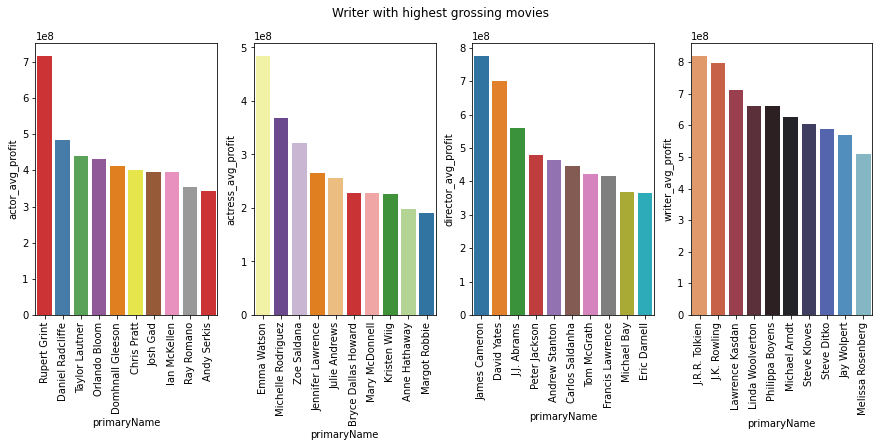

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Writer with highest grossing movies')
actress_prof = actress_rev_pro.sort_values('actress_avg_profit',ascending=False).loc[:,('primaryName','actress_avg_profit')].head(10)
director_prof = director_rev_pro.sort_values('director_avg_profit',ascending=False).loc[:,('primaryName','director_avg_profit')].head(10)
writer_prof = writer_rev_pro.sort_values('writer_avg_profit',ascending=False).loc[:,('primaryName','writer_avg_profit')].head(10)
actor_prof = actor_rev_pro.sort_values('actor_avg_profit',ascending=False).loc[:,('primaryName','actor_avg_profit')].head(10)
ax= sns.barplot(x='primaryName',y='actor_avg_profit',data=actor_prof,palette='Set1',ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.barplot(x='primaryName',y='actress_avg_profit',data=actress_prof,palette='Paired_r',ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.barplot(x='primaryName',y='director_avg_profit',data=director_prof,ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.barplot(x='primaryName',y='writer_avg_profit',data=writer_prof,palette='icefire_r',ax=axes[3])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### genre

In [ ]:
genre = new_df['genre'].astype(str).str.split(',', expand = True).replace(regex=[r' ',r'\n'], value='')
genre

,0,1,2
0,Comedy,Fantasy,Romance
2,Crime,Drama,Sci-Fi
5,Horror,Thriller,None
6,Horror,None,None
7,Biography,Crime,Drama
...,...,...,...
8865,Biography,Drama,None
8869,Drama,Fantasy,Romance
8870,Animation,Action,Adventure
8872,Horror,Mystery,Sci-Fi


In [ ]:
genre_arr = pd.unique(genre.values.ravel('K'))
genre_arr = genre_arr[genre_arr != np.array(None)]
genre_arr

array(['Comedy', 'Crime', 'Horror', 'Biography', 'Drama', 'Action',
       'Adventure', 'Mystery', 'Fantasy', 'Animation', 'Western',
       'Family', 'Sci-Fi', 'Romance', 'Thriller', 'Musical', 'War',
       'Sport', 'Music', 'History'], dtype=object)

In [ ]:
genre = new_df[['genre', 'imdb_id']].replace(regex=r' ', value='')
genre['genre_list'] = new_df['genre'].astype(str).replace(regex=[r' ',r'\n'], value='')
genre['genre_count'] = genre['genre_list'].str.split(',').str.len()
for g in genre_arr:
    genre[f'{g}'] = np.where(genre['genre'].str.contains(g), 1, 0)
genre.drop('genre', axis=1, inplace=True)

In [ ]:
genre

,imdb_id,genre_list,genre_count,Comedy,Crime,Horror,Biography,Drama,Action,Adventure,Mystery,Fantasy,Animation,Western,Family,Sci-Fi,Romance,Thriller,Musical,War,Sport,Music,History
0,tt0035423,"Comedy,Fantasy,Romance",3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,tt0066921,"Crime,Drama,Sci-Fi",3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,tt0077651,"Horror,Thriller",2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,tt0078767,Horror,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,tt0079116,"Biography,Crime,Drama",3,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8865,tt6113488,"Biography,Drama",2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8869,tt6265828,"Drama,Fantasy,Romance",3,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
8870,tt6389344,"Animation,Action,Adventure",3,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
8872,tt6574272,"Horror,Mystery,Sci-Fi",3,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Create genre_point dataframe to calulate point based on popularity
genre_point_df = pd.DataFrame(genre_arr, columns=['genre'])

In [ ]:
new_df = new_df.drop(columns=['genre'])
cast_genre = pd.merge(combo_cast,genre,on='imdb_id',how='inner')
data = pd.merge(new_df,cast_genre,on='imdb_id',how='inner')
data

,imdb_id,title,date_published,duration,budget,revenue,reviews_from_users,reviews_from_critics,year,popularity,overview,Month,Day,day_of_week,month_name,profit,ROI,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,writer_movie_count,writer_movie_pop,crew_count,crew_pop,genre_list,genre_count,Comedy,Crime,Horror,Biography,Drama,Action,Adventure,Mystery,Fantasy,Animation,Western,Family,Sci-Fi,Romance,Thriller,Musical,War,Sport,Music,History
0,tt0035423,Kate & Leopold,2002-04-05,118,48000000,76019048,330.0,127.0,2002,7.196356,When her scientist ex-boyfriend discovers a po...,4,5,Friday,April,28019048,58.373017,3.0,8.748445,1.0,7.776708,1.0,15.934599,1.0,7.377117,4.0,4.131288,"Comedy,Fantasy,Romance",3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,tt0066921,A Clockwork Orange,2000-03-17,136,2200000,26903440,1481.0,168.0,2000,17.112594,Demonic gang-leader Alex goes on the spree of ...,3,17,Friday,March,24703440,1122.883636,2.0,9.998665,0.0,0.000000,1.0,15.983537,0.0,0.000000,2.0,4.999333,"Crime,Drama,Sci-Fi",3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,tt0077651,Halloween,1980-03-07,91,325000,47000000,1399.0,406.0,1980,13.672759,"In John Carpenter's horror classic, a psychoti...",3,7,Friday,March,46675000,14361.538462,1.0,9.634168,1.0,8.547627,1.0,9.819353,2.0,9.825820,2.0,9.090897,"Horror,Thriller",2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,tt0078767,The Amityville Horror,1980-01-25,117,4700000,86432000,296.0,125.0,1980,14.003180,"George Lutz and his wife Kathleen, move into t...",1,25,Friday,January,81732000,1738.978723,2.0,8.030415,1.0,7.059906,1.0,11.053215,4.0,13.545866,3.0,5.030107,Horror,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0079116,Escape from Alcatraz,1980-01-25,112,8000000,43004381,156.0,68.0,1980,11.837667,Escape from Alcatraz tells the story of the on...,1,25,Friday,January,35004381,437.554763,2.0,12.406851,0.0,0.000000,2.0,7.354229,0.0,0.000000,2.0,6.203426,"Biography,Crime,Drama",3,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,tt6113488,The Case for Christ,2017-04-07,112,5000000,17644496,133.0,43.0,2017,3.674827,Based on the true story of an award-winning in...,4,7,Friday,April,12644496,252.889920,1.0,7.750526,2.0,5.964918,1.0,2.425265,1.0,3.636398,3.0,4.571815,"Biography,Drama",2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6892,tt6265828,A Ghost Story,2017-08-11,92,100000,1951683,478.0,308.0,2017,24.339781,"Recently deceased, a white-sheeted ghost retur...",8,11,Friday,August,1851683,1851.683000,1.0,7.920034,1.0,12.427831,1.0,18.264861,0.0,0.000000,2.0,10.173932,"Drama,Fantasy,Romance",3,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6893,tt6389344,Tri bogatyrya i Morskoy tsar,2017-01-01,75,4000000,13816357,NaN,1.0,2017,0.468664,No plot overview available,1,1,Sunday,January,9816357,245.408925,4.0,2.559049,0.0,0.000000,1.0,0.468888,1.0,1.474589,4.0,0.639762,"Animation,Action,Adventure",3,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
6894,tt6574272,Phoenix Forgotten,2017-04-21,87,2800000,3697729,68.0,66.0,2017,12.560942,20 years after three teenagers disappeared in ...,4,21,Friday,April,897729,32.061750,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,43.574867,0.0,NaN,"Horror,Mystery,Sci-Fi",3,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
data = data[(data['year'] >= 1980) & (data['year'] <= 2017)]
data.reset_index(drop=True,inplace=True)

# Merge rating

In [ ]:
data.shape

(6896, 49)

In [ ]:
imdb_rating = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Group Assignment/IMDb ratings.csv", delimiter=",")
imdb_rating = imdb_rating.drop(columns=['allgenders_0age_avg_vote','allgenders_0age_votes','males_0age_avg_vote','males_0age_votes','females_0age_avg_vote','females_0age_votes','votes_10','votes_9','votes_8','votes_7','votes_6','votes_5','votes_4','votes_3','votes_2','votes_1','weighted_average_vote','top1000_voters_votes', 'top1000_voters_rating'])
imdb_rating = imdb_rating.rename(columns={'imdb_title_id':'imdb_id'})
imdb_rating

,imdb_id,total_votes,mean_vote,median_vote,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,537,6.3,6.0,6.2,126.0,5.9,209.0,6.4,100.0,6.1,393.0,6.2,112.0,5.9,186.0,6.4,85.0,6.1,48.0,5.7,14.0,6.0,19.0,6.6,14.0,6.0,89.0,6.2,309.0
1,tt0001892,171,6.1,6.0,5.7,25.0,6.0,60.0,6.3,58.0,6.0,131.0,5.8,21.0,6.0,56.0,6.3,50.0,5.7,16.0,5.8,4.0,5.8,4.0,6.5,8.0,6.2,27.0,6.0,114.0
2,tt0002101,420,5.2,5.0,4.6,24.0,5.1,104.0,5.3,180.0,5.0,278.0,4.6,20.0,5.1,89.0,5.2,159.0,5.8,39.0,4.5,4.0,5.5,14.0,6.2,20.0,5.5,197.0,4.7,103.0
3,tt0002130,2019,6.9,7.0,7.0,429.0,7.0,783.0,7.1,430.0,7.0,1464.0,7.0,371.0,7.0,701.0,7.0,346.0,7.2,205.0,6.8,53.0,7.3,74.0,7.4,75.0,7.1,452.0,7.0,1076.0
4,tt0002199,438,5.8,6.0,5.7,38.0,5.6,156.0,5.9,147.0,5.8,318.0,5.8,34.0,5.7,142.0,5.8,131.0,5.4,29.0,5.0,4.0,4.8,10.0,6.5,15.0,5.9,161.0,5.7,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,219,8.1,9.0,7.0,43.0,7.0,34.0,4.6,9.0,7.1,97.0,7.1,38.0,7.3,28.0,4.1,6.0,5.8,17.0,7.0,3.0,5.6,6.0,6.7,3.0,5.0,14.0,7.1,45.0
81269,tt9905412,510,7.8,9.0,1.0,2.0,5.5,2.0,10.0,1.0,3.0,4.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0
81270,tt9905462,604,8.1,9.0,5.5,2.0,1.0,1.0,NaN,NaN,4.0,3.0,5.5,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0
81271,tt9911774,369,8.2,9.0,1.0,1.0,10.0,1.0,NaN,NaN,5.5,2.0,1.0,1.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [ ]:
final_df = pd.merge(data,imdb_rating,how='inner',on='imdb_id')

# Processing values

In [ ]:
final_df['overview_count'] = final_df['overview'].str.split().str.len()
final_df['overview_count'] = final_df['overview_count'].replace(np.nan,0,regex=False)

In [ ]:
final_df['ROI_group'] = np.where(final_df['ROI'] > 0, 1, 0)

In [ ]:
total = final_df.isnull().sum().sort_values(ascending=False)
zero = final_df.isin([0]).sum()
percent_1 = final_df.isnull().sum()/final_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, zero,percent_2], axis=1, keys=['Total nan','Total zero', '%'])

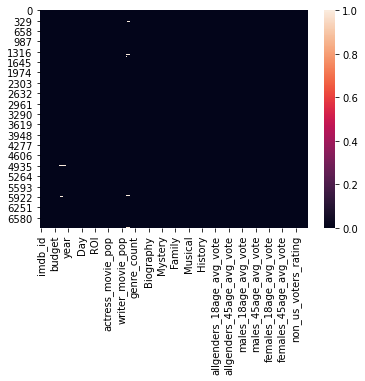

In [ ]:
sns.heatmap(final_df.isnull())

In [ ]:
final_df['females_45age_votes'].fillna(value=final_df['females_allages_votes'], inplace=True)
final_df['females_18age_votes'].fillna(value=final_df['females_allages_votes'], inplace=True)
final_df['females_30age_votes'].fillna(value=final_df['females_allages_votes'], inplace=True)
final_df['females_45age_avg_vote'].fillna(value=final_df['females_allages_avg_vote'], inplace=True)
final_df['females_18age_avg_vote'].fillna(value=final_df['females_allages_avg_vote'], inplace=True)
final_df['females_30age_avg_vote'].fillna(value=final_df['females_allages_avg_vote'], inplace=True)
final_df['males_18age_avg_vote'].fillna(value=final_df['males_allages_avg_vote'], inplace=True)
final_df['males_45age_avg_vote'].fillna(value=final_df['males_allages_avg_vote'], inplace=True)
final_df['males_18age_votes'].fillna(value=final_df['males_allages_votes'], inplace=True)
final_df['males_45age_votes'].fillna(value=final_df['males_allages_votes'], inplace=True)
final_df['allgenders_18age_avg_vote'].fillna(value=(final_df['males_18age_avg_vote']+final_df['females_18age_avg_vote'])/2, inplace=True)
final_df['allgenders_18age_votes'].fillna(value=(final_df['males_18age_votes']+final_df['females_18age_votes'])/2, inplace=True)

In [ ]:
final_df = final_df.fillna(0)

### Create Users or Critics feature

In [ ]:
final_df['us_voters_votes'].fillna(value=final_df['total_votes']-final_df['non_us_voters_votes'], inplace=True)
final_df['us_voters_rating'].fillna(value=final_df['mean_vote'], inplace=True)

In [ ]:
final_df['reviews_from_critics'].fillna(value=0, inplace=True)
final_df['reviews_from_users'].fillna(value=0, inplace=True)

In [ ]:
conditions = [(final_df['reviews_from_users'] == final_df['reviews_from_critics']), 
              (final_df['reviews_from_users'] > final_df['reviews_from_critics']), 
              (final_df['reviews_from_users'] < final_df['reviews_from_critics'])]
choices = [0, 1, 2]
final_df['users_or_critics'] = np.select(conditions, choices, default=0)
final_df.drop(['reviews_from_users', 'reviews_from_critics'], axis=1, inplace=True)

### Statistic about cleaning data

In [ ]:
stats = pd.DataFrame({'rows':[imdb_df.shape[0],meta_data.shape[0],merge_df.shape[0],dataframe.shape[0],year_df.shape[0],new_df.shape[0],imdb_cast.shape[0],cast.shape[0],data.shape[0],imdb_rating.shape[0],final_df.shape[0]],'columns':[imdb_df.shape[1],meta_data.shape[1],merge_df.shape[1],dataframe.shape[1],year_df.shape[1],new_df.shape[1],imdb_cast.shape[1],cast.shape[1],data.shape[1],imdb_rating.shape[1],final_df.shape[1]]},index=['imdb_df','meta_data','merge_df','dataframe','year_df','new_df','imdb_cast','cast','data','imdb_rating','final_df'])
stats

,rows,columns
imdb_df,81273,10
meta_data,45466,3
merge_df,34521,12
dataframe,9377,16
year_df,7098,18
new_df,7098,17
imdb_cast,23811321,4
cast,47888,8
data,6896,49
imdb_rating,81273,30


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6896 entries, 0 to 6895
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   imdb_id                    6896 non-null   object        
 1   title                      6896 non-null   object        
 2   date_published             6896 non-null   datetime64[ns]
 3   duration                   6896 non-null   int64         
 4   budget                     6896 non-null   int64         
 5   revenue                    6896 non-null   int64         
 6   year                       6896 non-null   int64         
 7   popularity                 6896 non-null   float64       
 8   overview                   6896 non-null   object        
 9   Month                      6896 non-null   int64         
 10  Day                        6896 non-null   int64         
 11  day_of_week                6896 non-null   object        
 12  month_

## Genre point

In [ ]:
final_df.columns.values

array(['imdb_id', 'title', 'date_published', 'duration', 'budget',
       'revenue', 'year', 'popularity', 'overview', 'Month', 'Day',
       'day_of_week', 'month_name', 'profit', 'ROI', 'actor_movie_count',
       'actor_movie_pop', 'actress_movie_count', 'actress_movie_pop',
       'director_movie_count', 'director_movie_pop', 'writer_movie_count',
       'writer_movie_pop', 'crew_count', 'crew_pop', 'genre_list',
       'genre_count', 'Comedy', 'Crime', 'Horror', 'Biography', 'Drama',
       'Action', 'Adventure', 'Mystery', 'Fantasy', 'Animation',
       'Western', 'Family', 'Sci-Fi', 'Romance', 'Thriller', 'Musical',
       'War', 'Sport', 'Music', 'History', 'total_votes', 'mean_vote',
       'median_vote', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_18age_avg_vote', 'males_18a

In [ ]:
genre_df = final_df[['imdb_id','genre_list']].copy()
genre_df = pd.DataFrame(genre_df['genre_list'].str.split(',').tolist(), index=genre_df['imdb_id']).stack()
genre_df = genre_df.reset_index([0, 'imdb_id'])
genre_df.columns = ['imdb_id', 'genre']
merge_df = final_df.drop(['title','year','day_of_week','month_name',
                          'date_published', 'genre_list', 
                          'Drama', 'Adventure', 'Comedy','Crime', 'Western', 
                          'Biography', 'Action', 'Animation', 'Horror','Family', 'Mystery', 
                          'Musical', 'Sci-Fi', 'Fantasy', 'Romance','Thriller', 'Music', 'War', 
                          'Sport', 'History','users_or_critics'], axis=1)
genre_df = pd.merge(genre_df, merge_df, on='imdb_id')

In [ ]:
genre_df['point'] = genre_df['popularity']/genre_df['genre_count']

In [ ]:
genre_revenue_month = genre_df[['genre','Month','revenue']].copy().groupby(['genre','Month'])['revenue'].mean().to_frame()
genre_revenue_month.reset_index(inplace=True)
genre_revenue_month = genre_revenue_month.groupby('genre')['revenue'].apply(list).to_frame()
genre_revenue_month.reset_index(inplace=True)
genre_profit_month = genre_df[['genre','Month','profit']].copy().groupby(['genre','Month'])['profit'].mean().to_frame()
genre_profit_month.reset_index(inplace=True)
genre_profit_month = genre_profit_month.groupby('genre')['profit'].apply(list).to_frame()
genre_profit_month.reset_index(inplace=True)
genre_m_r_p = pd.merge(left=genre_revenue_month, right=genre_profit_month, on='genre')
genre_m_r_p.rename(columns={'revenue':'revenue_by_month','profit':'profit_by_month'}, inplace=True)

In [ ]:
genre_month = genre_df[['genre','Month']].copy().groupby('genre')['Month'].apply(list).to_frame()
genre_month.reset_index(inplace=True)
for i, row in genre_month.iterrows():
    count = [0] * 12
    for u in row.values[1]:
        count[u-1] += 1
    genre_month['Month'][i]= count
print(sum(genre_month['Month'].values[0]))
genre_month['Total'] = [sum(a) for a in genre_month['Month']]
genre_month = pd.merge(left=genre_month, right=genre_m_r_p, on='genre')
genre_month

1707


,genre,Month,Total,revenue_by_month,profit_by_month
0,Action,"[143, 111, 133, 148, 128, 132, 170, 190, 160, ...",1707,"[76939542.91608392, 77970583.53153153, 1116974...","[40981102.35664336, 40364277.225225225, 634417..."
1,Adventure,"[60, 90, 97, 104, 72, 82, 159, 126, 60, 122, 7...",1189,"[123193462.81666666, 127067644.42222223, 16394...","[73345129.48333333, 75888241.06666666, 1022923..."
2,Animation,"[9, 27, 30, 20, 13, 18, 59, 31, 12, 43, 12, 47]",321,"[218296810.44444445, 208651958.44444445, 21407...","[154705143.7777778, 125735428.74074075, 153303..."
3,Biography,"[62, 47, 64, 27, 25, 25, 16, 18, 36, 34, 48, 20]",422,"[99901144.59677419, 42811978.34042553, 4593100...","[67607596.20967741, 20375808.127659574, 202067..."
4,Comedy,"[186, 230, 253, 243, 221, 205, 217, 270, 228, ...",2730,"[57930886.55913979, 73633777.57391304, 5535296...","[34281623.11827957, 43877821.05217391, 3147464..."
5,Crime,"[149, 103, 147, 138, 116, 99, 71, 117, 155, 12...",1403,"[44101914.37583893, 55312115.291262135, 421963...","[20930390.88590604, 27937552.18446602, 1838277..."
6,Drama,"[402, 329, 347, 345, 293, 281, 209, 258, 366, ...",3745,"[64733468.49751244, 45200692.89361702, 5106129...","[40538045.6119403, 23739853.069908816, 2985575..."
7,Family,"[12, 32, 32, 26, 28, 22, 56, 52, 10, 52, 25, 68]",415,"[111103196.58333333, 87399212.625, 163707413.3...","[89915363.25, 46742962.625, 119863663.375, 721..."
8,Fantasy,"[41, 44, 50, 41, 43, 34, 43, 58, 36, 55, 41, 78]",564,"[49420466.56097561, 83348958.97727273, 1388053...","[18967100.707317073, 42184868.06818182, 902327..."
9,History,"[32, 33, 19, 23, 11, 14, 10, 14, 20, 16, 11, 17]",220,"[103274381.65625, 42940329.18181818, 52338489....","[68680631.65625, 15064571.606060605, 19622700...."


In [ ]:
genre_point = genre_df.drop(['Month','popularity','genre_count'],axis=1).groupby('genre', as_index=False).mean()
genre_act_count = genre_df[['genre']].groupby('genre', as_index=False).sum()

In [ ]:
genre_point_df= pd.merge(genre_point_df, genre_point, on='genre')
genre_point_df= pd.merge(genre_point_df, genre_act_count, on='genre')
genre_point_df= pd.merge(genre_point_df, genre_month, on='genre')

In [ ]:
genre_point_df.head()

,genre,duration,budget,revenue,Day,profit,ROI,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,writer_movie_count,writer_movie_pop,crew_count,crew_pop,total_votes,mean_vote,median_vote,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,overview_count,ROI_group,point,Month,Total,revenue_by_month,profit_by_month
0,Comedy,100.274359,2.619015e+07,6.763872e+07,15.928205,4.144857e+07,321.005584,2.144322,8.223010,1.233333,6.495735,1.011722,6.798847,1.317582,6.423742,3.377656,4.528848,59802.282784,6.271355,6.283883,6.196300,14372.642491,6.003150,25074.879121,5.957179,6457.964835,5.991648,37065.587546,6.120220,10067.470696,5.951319,19946.657875,5.906850,5258.098168,6.213883,10665.976923,6.308571,4107.586447,6.142784,4843.578388,6.190916,1102.217949,6.076300,11796.693773,5.968828,27282.023077,51.636996,0.588278,3.349708,"[186, 230, 253, 243, 221, 205, 217, 270, 228, ...",2730,"[57930886.55913979, 73633777.57391304, 5535296...","[34281623.11827957, 43877821.05217391, 3147464..."
1,Crime,106.382038,2.338307e+07,4.469702e+07,16.119743,2.131395e+07,108.943233,2.478974,8.834156,0.980756,6.180335,1.058446,7.359247,1.179615,6.673653,3.459729,4.518612,73939.825374,6.451818,6.498931,6.457662,15595.183892,6.257947,32727.159658,6.218247,8615.768354,6.281397,50553.824661,6.431148,12637.128297,6.244975,28142.582324,6.192516,7317.635068,6.386172,8623.366358,6.516322,2754.655738,6.307627,4216.608696,6.390663,1167.818247,6.322452,12976.335709,6.245830,35674.390592,49.337135,0.491803,2.973960,"[149, 103, 147, 138, 116, 99, 71, 117, 155, 12...",1403,"[44101914.37583893, 55312115.291262135, 421963...","[20930390.88590604, 27937552.18446602, 1838277..."
2,Horror,97.527224,1.492569e+07,3.790863e+07,15.880478,2.298294e+07,514839.471161,1.703851,7.315871,1.047809,6.045655,0.938911,7.117669,1.235060,7.029108,2.751660,5.008731,55929.452855,5.889774,5.906375,5.772643,11805.977424,5.683001,25298.569721,5.686720,6420.918991,5.685126,37139.342629,5.748340,8922.185923,5.664542,21124.641434,5.652590,5419.406375,5.806375,7959.628154,5.814874,2725.314741,5.763878,3889.501992,5.892430,903.338645,5.793758,10928.796813,5.624170,26432.739708,50.261620,0.579017,3.675093,"[72, 56, 60, 72, 68, 57, 40, 65, 80, 93, 66, 24]",753,"[36442529.375, 48929317.125, 34811183.91666666...","[20303293.263888888, 31947174.26785714, 220965..."
3,Biography,120.424171,2.429407e+07,4.844800e+07,15.263033,2.415393e+07,115.279801,2.229858,9.255471,1.116114,6.809116,0.988152,7.975777,1.028436,6.540456,3.345972,5.189593,86917.080569,7.124171,7.194313,7.098341,20143.182464,6.917299,35805.571090,6.910900,9958.144550,6.926540,55924.433649,7.045261,15380.059242,6.873697,29364.218009,6.857583,8105.296209,7.116825,12995.104265,7.145972,4486.037915,7.038863,6004.616114,7.154265,1695.872038,6.986019,14231.452607,6.914929,40847.938389,46.362559,0.561611,2.965986,"[62, 47, 64, 27, 25, 25, 16, 18, 36, 34, 48, 20]",422,"[99901144.59677419, 42811978.34042553, 4593100...","[67607596.20967741, 20375808.127659574, 202067..."
4,Drama,110.801602,2.083200e+07,4.543689e+07,15.896662,2.460489e+07,245.385992,2.053672,8.253303,1.179172,6.556880,0.911615,6.563624,0.915621,5.693019,3.232844,4.769477,68786.381842,6.704513,6.776636,6.663097,15575.387984,6.468785,29095.846195,6.451108,7912.269693,6.466061,43645.680107,6.603818,11409.989052,6.421682,23548.707877,6.398425,6459.576769,6.665180,11125.801335,6.735461,3949.947664,6.590227,5199.121495,6.680374,1328.833912,6.

In [ ]:
genre_point_df.to_csv('/content/drive/My Drive/Colab Notebooks/Group Assignment/genre_point.csv',index=False)

In [ ]:
final_df.to_csv('/content/drive/My Drive/Colab Notebooks/Group Assignment/movies.csv',index=False)